<a href="https://colab.research.google.com/github/onurerdogan2001/ie423tasks/blob/main/notebooks/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

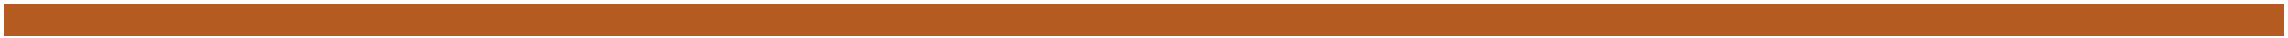

## <font color='#475468'> Football Players Value:</font>
### <font color='#475468'> Can you predict player value based on information?</font>

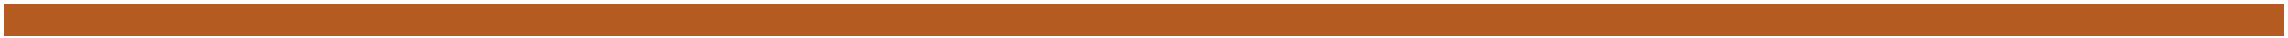

## Initialize

In [1]:
import pandas as pd
import numpy as np

## Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dfMlb = pd.read_csv('/content/drive/MyDrive/yazokulu/football.csv')

In [4]:
dfMlb.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

## Select Data

### Select a prediction "Target"
The column we want to predict is called the prediction **target**. By convention, the prediction target is called y. In our case, we want to predict Price.

In [5]:
y = dfMlb.loc[:,['current_value']]

### Choose "Features"
The columns that are input into our model (and later used to make predictions) are called **features**. In our case, those would be the columns used to determine the home price.

In [6]:
X = dfMlb.loc[:,['goals', 'assists', 'clean sheets', 'award', 'height', 'age']]

In [7]:
# View top few rows
X.head()

,goals,assists,clean sheets,award,height,age
0,0.000000,0.000000,0.335463,13,189.0,32.0
1,0.000000,0.000000,0.207055,1,196.0,30.0
2,0.000000,0.000000,0.924658,4,188.0,37.0
3,0.028090,0.056180,0.000000,9,175.0,25.0
4,0.017889,0.017889,0.000000,21,191.0,30.0


In [8]:
# Describe columns using basic stats
X.describe()

,goals,assists,clean sheets,award,height,age
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000
mean,0.125554,0.086978,0.044881,1.960759,181.240353,26.041903
std,0.235585,0.143351,0.924437,3.743936,6.969818,4.777629
min,0.000000,0.000000,0.000000,0.000000,156.000000,15.000000
25%,0.000000,0.000000,0.000000,0.000000,176.000000,22.000000
50%,0.045969,0.040773,0.000000,1.000000,181.240353,26.000000
75%,0.172263,0.133136,0.000000,2.000000,186.000000,29.000000
max,11.250000,4.000000,90.000000,92.000000,206.000000,43.000000


Note: Describing data is a great way to determine if there are any anomalous data points...

As a sidenote, functions such as df.describe() that include a parantheses are **methods** whereas functions such as df.columns that don't include parantheses are **attributes**.

## Build Model

The steps to building and using a model are:

* **Define:** Define the appropriate model to use. Depending on the model choice, other parameters are specified too.
* **Fit:** Fit the model to the data by capturing patterns.
* **Predict:** Predict other data points using the fitted model.
* **Evaluate:** Evaluate the model's prediction.

We will use the sklearn library to create our models.

#### Define

In [9]:
import sklearn
from sklearn.tree import DecisionTreeRegressor

# Fix the seed to the random number generator to ensure same results each run.
mdlDtrMlb = DecisionTreeRegressor(random_state=1)

#### Fit

In [10]:
mdlDtrMlb.fit(X,y)

DecisionTreeRegressor(random_state=1)

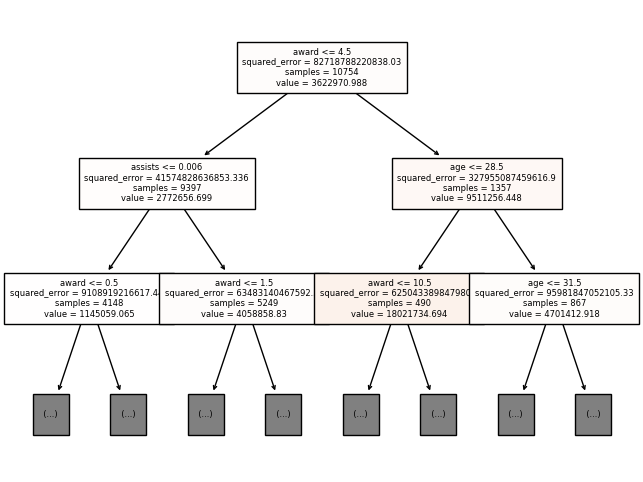

In [11]:
# Show model
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6), dpi=100)
plot_tree(mdlDtrMlb, max_depth=2, feature_names=X.columns, fontsize= 6, filled=True)
plt.show()

We now have a fitted model that we can use to make predictions.

In practice, we'll want to make predictions for new houses coming on the market rather than the houses we already have prices for. But we'll make predictions for the first few rows of the "Training Data" to see how the predict function works.

#### Predict

In [12]:
print('First few players:')
print(X.head())
print('value predictions:')
print(mdlDtrMlb.predict(X.head()))

First few players:
      goals   assists  clean sheets  award  height   age
0  0.000000  0.000000      0.335463     13   189.0  32.0
1  0.000000  0.000000      0.207055      1   196.0  30.0
2  0.000000  0.000000      0.924658      4   188.0  37.0
3  0.028090  0.056180      0.000000      9   175.0  25.0
4  0.017889  0.017889      0.000000     21   191.0  30.0
value predictions:
[15000000.  1500000.   600000. 50000000. 40000000.]


In [13]:
y.head()

,current_value
0,15000000
1,1500000
2,600000
3,50000000
4,40000000


#### Evaluate
There are many metrics for summarizing model quality, but we'll start with one called Mean Absolute Error (also called MAE).

In [14]:
from sklearn.metrics import mean_absolute_error

y_pred = mdlDtrMlb.predict(X)
print('MAE:')
print(mean_absolute_error(y,y_pred))

MAE:
77099.08146740793


Hold on... We just "Trained" and "Tested" the model on the same data.  This is called an in-sample score, but it doesn't reflect the fact that we want to make predictions on future data based on past data.  What we really want is an out-of-sample score.  For this, we will split the data into a **Training set** and a **Test set** so that we can build the model on the Training data set and validate the model on the Test data set.

In [15]:
from sklearn.model_selection import train_test_split

# Split features and target into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, test_size=0.2,random_state=1)

In [16]:
# Rebuild model
mdlDtrMlbSpl = DecisionTreeRegressor(random_state=1)
mdlDtrMlbSpl.fit(X_train, y_train)

# Predict test data
y_test_pred = mdlDtrMlbSpl.predict(X_test)

# Evaluate test data actual vs prediction
print('MAE (after train-test-split):')
print(mean_absolute_error(y_test,y_test_pred))

MAE (after train-test-split):
4549506.715388331


In-sample model was only 77000 (which is good I think considering the market of football nowadays) from the mean on average whereas the out-of-sample model was a whopping 4,549,506 (not good lol) off from the mean. It is needed to be improved.

utexas_ds_orie_divider_gray.png

## Improve Decision Tree Model
There are many settings in a Decision Tree model that we can tweak.  The most important one is the tree's depth.  Let's see what happens when we tweak the max_leaf_nodes in the Decision Tree model.

In [17]:
# Function to build and return MAE for a given number of max_leaf_nodes
def get_mae(mx_lf_nds, X_trn, X_tst, y_trn, y_tst):
    mdlDtrMlbDpt = DecisionTreeRegressor(max_leaf_nodes=mx_lf_nds, random_state=1)
    mdlDtrMlbDpt.fit(X_trn,y_trn)
    y_tst_prd = mdlDtrMlbDpt.predict(X_tst)
    mae = mean_absolute_error(y_tst, y_tst_prd)
    return(mae)

In [18]:
# Iterate over a list of max_leaf_nodes to determine MAE across all
for i in [5, 50, 500, 50000]:
    mae = get_mae(i, X_train, X_test, y_train, y_test)
    print('Max leaf nodes: ',i, '\t Mean Absolute Error: ',mae)

Max leaf nodes:  5 	 Mean Absolute Error:  3973941.1639116453
Max leaf nodes:  50 	 Mean Absolute Error:  3618227.292059826
Max leaf nodes:  500 	 Mean Absolute Error:  4074411.6547684753
Max leaf nodes:  50000 	 Mean Absolute Error:  4554475.3346351925


The best depth of the tree is at 50 max leaf nodes.

Thus tweaking the settings of the Decision Tree model has resulted in reducing the MAE from 4549506 to 3618227.

## Build Ensemble Random Forest Model
While the Decision Tree is simple, it is also not the most accurate because only a single tree is created and all future data points have to traverse the same tree.  What if we could generate more trees?

In [20]:
from sklearn.ensemble import RandomForestRegressor

# Define random forest model
mdlRfsMlb = RandomForestRegressor(random_state=1)

# Fit model
mdlRfsMlb.fit(X_train, y_train)

# Predict
y_test_pred = mdlRfsMlb.predict(X_test)

# Evaluate
print('MAE (Random Forest):')
print(mean_absolute_error(y_test,y_test_pred))

<ipython-input-20-f82555515a8a>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdlRfsMlb.fit(X_train, y_train)


MAE (Random Forest):
3558416.539134143


So, the Random Forest model reduces the MAE to 3558416. Which is better but not that better. I might need to find a better way to improve my model.